In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
from matplotlib.patches import Patch

In [4]:
data = pd.read_csv('Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Summary of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Information of Data types

data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
# Shape of dataset

data.shape

(200, 5)

In [8]:
# Statistical summary of numerical variables

data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# Missing values in dataset

data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# Duplicated values in dataset

data[data.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [11]:
# Labels in the variable

data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
# Different types of variables 

len(data['Gender'].unique())

2

C:\Users\Excalibur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Excalibur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Excalibur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


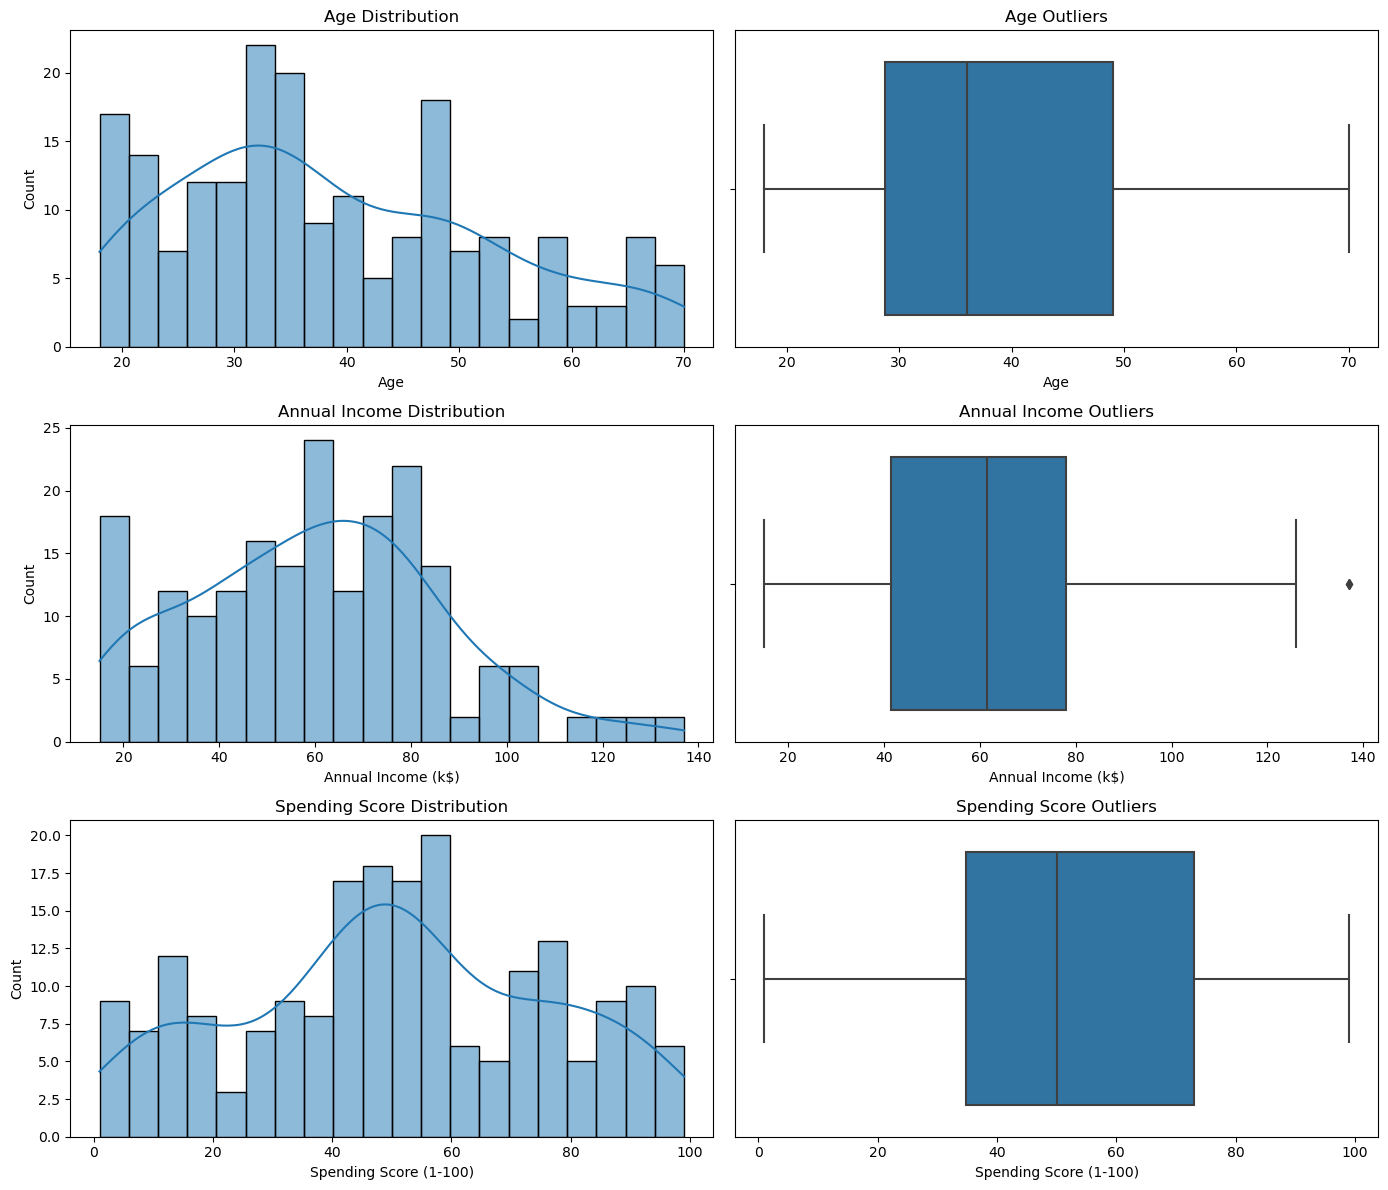

In [13]:
# Visualization of key numerical variables

fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Histogram for distribution plots
sns.histplot(data['Age'], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Annual Income Distribution')
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Spending Score Distribution')

# Box plots for outliers
sns.boxplot(x=data['Age'], ax=axs[0, 1])
axs[0, 1].set_title('Age Outliers')
sns.boxplot(x=data['Annual Income (k$)'], ax=axs[1, 1])
axs[1, 1].set_title('Annual Income Outliers')
sns.boxplot(x=data['Spending Score (1-100)'], ax=axs[2, 1])
axs[2, 1].set_title('Spending Score Outliers')

plt.tight_layout()
plt.show()

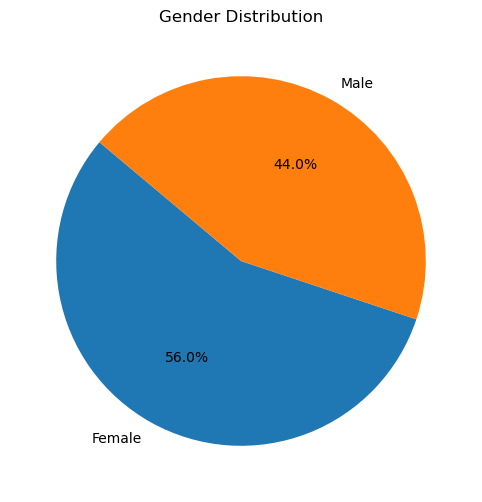

In [14]:
# Visualization of key categorical variables

gender_counts = data["Gender"].value_counts().reset_index()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts["count"],labels=gender_counts["Gender"], autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')

plt.show()

C:\Users\Excalibur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Excalibur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Excalibur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Excalibur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

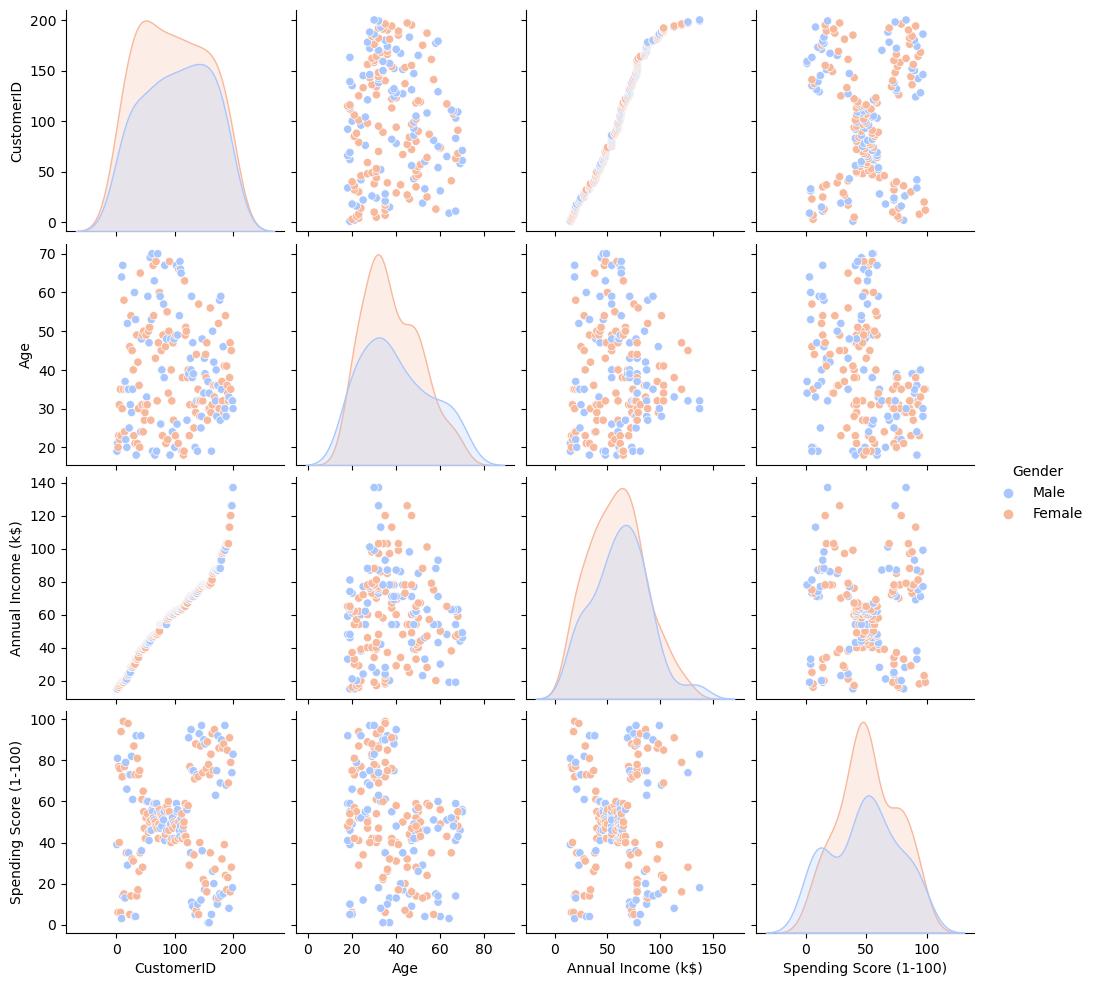

In [15]:
# Pairplot of variables

sns.pairplot(data,hue="Gender",palette="coolwarm")
plt.show()

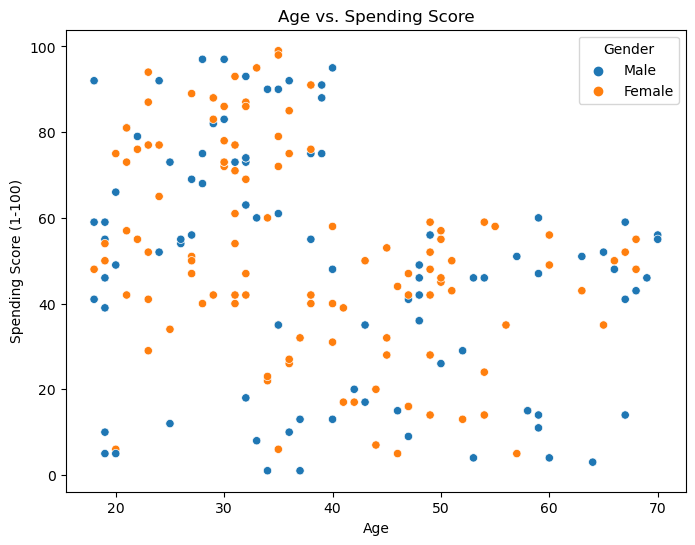

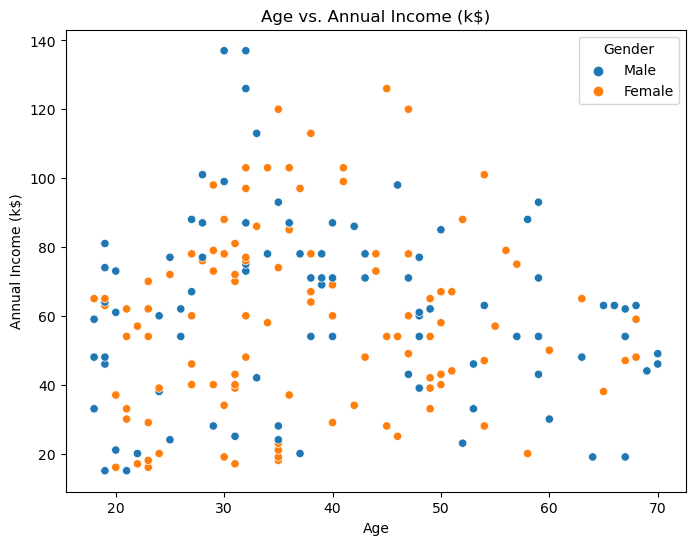

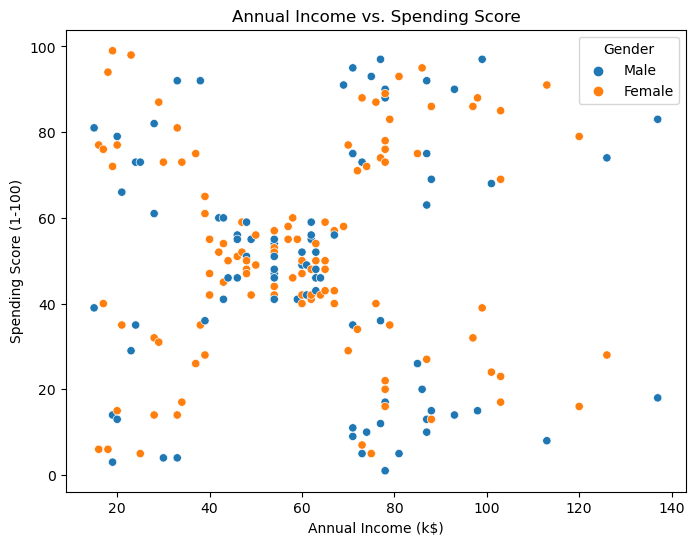

In [16]:
# Scatter Plot between Age, Spending Score and Annual Income

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=data)
plt.title('Age vs. Annual Income (k$)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [17]:
# Correlation Analysis

data = data.drop('CustomerID', axis=1) #CustomerId is not needed in the analysis

In [18]:
data['Gender'].value_counts(normalize = True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [19]:
# Converting 'Gender' column to a numerical representation for analysis
data['Gender_Encoded'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Dropping the original 'Gender' column
data = data.drop('Gender', axis=1)

In [20]:
# Correlation matrix to understand the relationships between mumerical values

correlation_matrix = data.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Encoded
Age,1.00,-0.01,-0.33,-0.06
Annual Income (k$),-0.01,1.00,0.01,-0.06
Spending Score (1-100),-0.33,0.01,1.00,0.06
Gender_Encoded,-0.06,-0.06,0.06,1.00


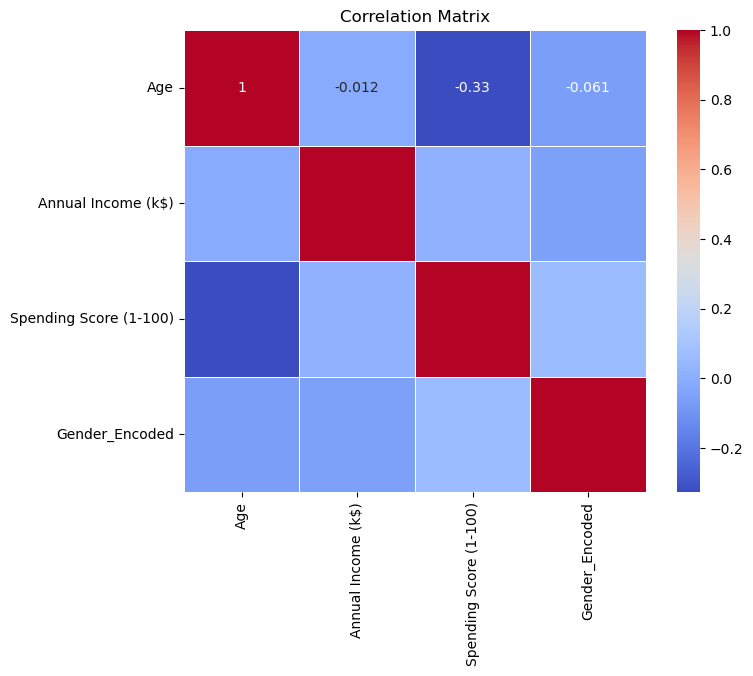

In [21]:
# Visualization of correlation heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Matrix')
plt.show()

In [147]:
# 1.Segmentation using Age and Spending Score

X1 = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    segmentation_model = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    segmentation_model.fit(X1)
    inertia.append(segmentation_model.inertia_)

C:\Users\Excalibur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Excalibur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


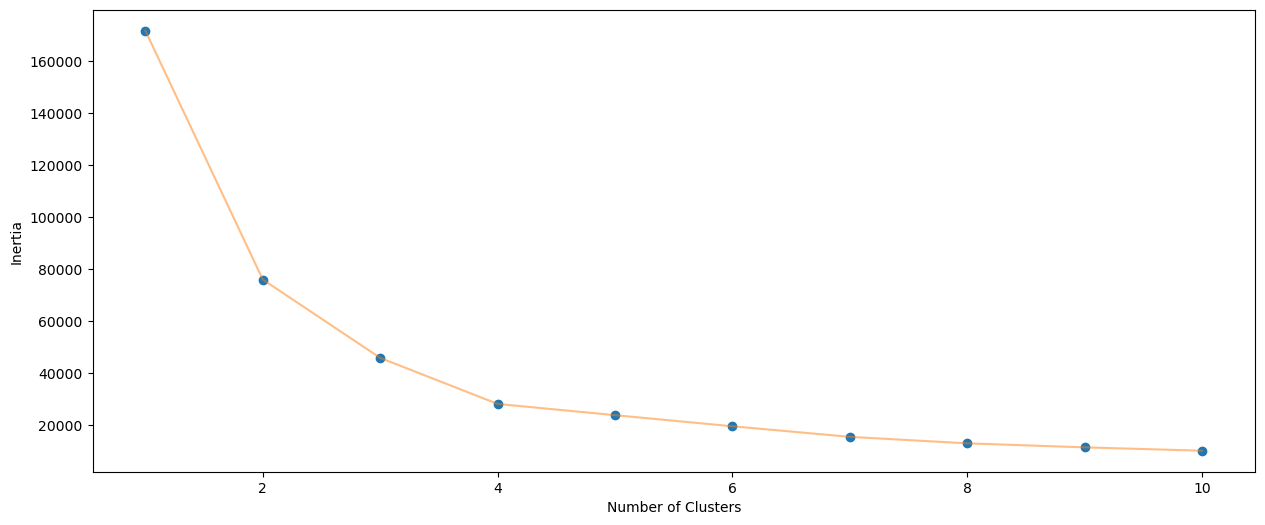

In [148]:
# Visualizing the ELBOW method to get the optimal value of K

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [149]:
# Model building

segmentation_model = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
segmentation_model.fit(X1)
labels1 = segmentation_model.labels_
centroids1 = segmentation_model.cluster_centers_

In [174]:
# Analysis of the characteristics of each cluster

data['Cluster'] = labels1
summary = data.groupby('Cluster').agg({
    'Age': ['count', 'mean'],
    'Spending Score (1-100)': ['mean']
}).reset_index()

summary.columns = ['Cluster', 'Count', 'Age_Mean', 'Spending_Score_Mean']

summary_gender = data.groupby(['Cluster', 'Gender_Encoded']).size().unstack(fill_value=0)
summary_gender_percentage = summary_gender.div(summary_gender.sum(axis=1), axis=0) * 100  
summary_gender_percentage = summary_gender_percentage.reset_index()

summary_gender_percentage.columns.name = None
summary_gender_percentage.columns = ['Cluster', 'Percentage_Male', 'Percentage_Female']

summary = summary.merge(summary_gender_percentage, on='Cluster')

print("Cluster Summary:")
print(summary.to_string(index=False, float_format='{:.2f}'.format))

Cluster Summary:
 Cluster  Count  Age_Mean  Spending_Score_Mean  Percentage_Male  Percentage_Female
       0     47     27.62                49.15            38.30              61.70
       1     48     43.29                15.02            50.00              50.00
       2     57     30.18                82.35            42.11              57.89
       3     48     55.71                48.23            45.83              54.17


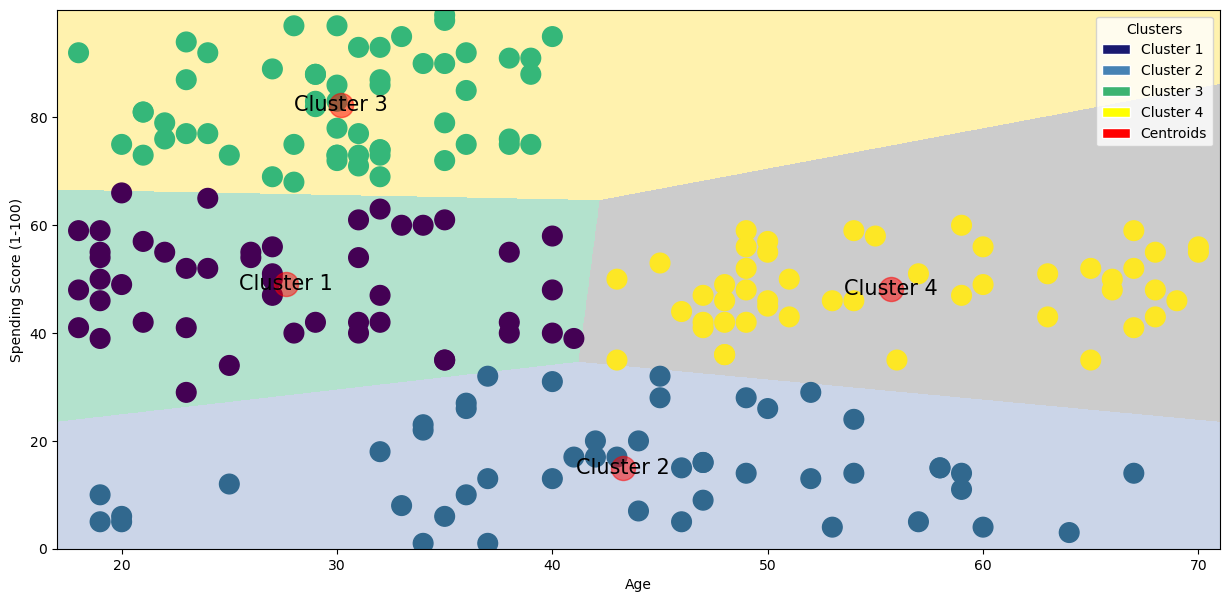

In [151]:
#Visualizing all the clusters 

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = segmentation_model.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)


for i, (x, y) in enumerate(centroids1):
    plt.text(x, y, f'Cluster {i+1}', color='black', fontsize=15, ha='center', va='center')

legend_elements = [
    Patch(facecolor='midnightblue', edgecolor='w', label='Cluster 1'),
    Patch(facecolor='steelblue', edgecolor='w', label='Cluster 2'),
    Patch(facecolor='mediumseagreen', edgecolor='w', label='Cluster 3'),
    Patch(facecolor='yellow', edgecolor='w', label='Cluster 4'),
    Patch(facecolor='red', edgecolor='w', label='Centroids')
]
plt.legend(handles=legend_elements, loc='best', title='Clusters')

plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [152]:
# 2. Segmentation using Annual Income and Spending Score

X2 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    segmentation_model_2 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    segmentation_model_2.fit(X2)
    inertia.append(segmentation_model_2.inertia_)

C:\Users\Excalibur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Excalibur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


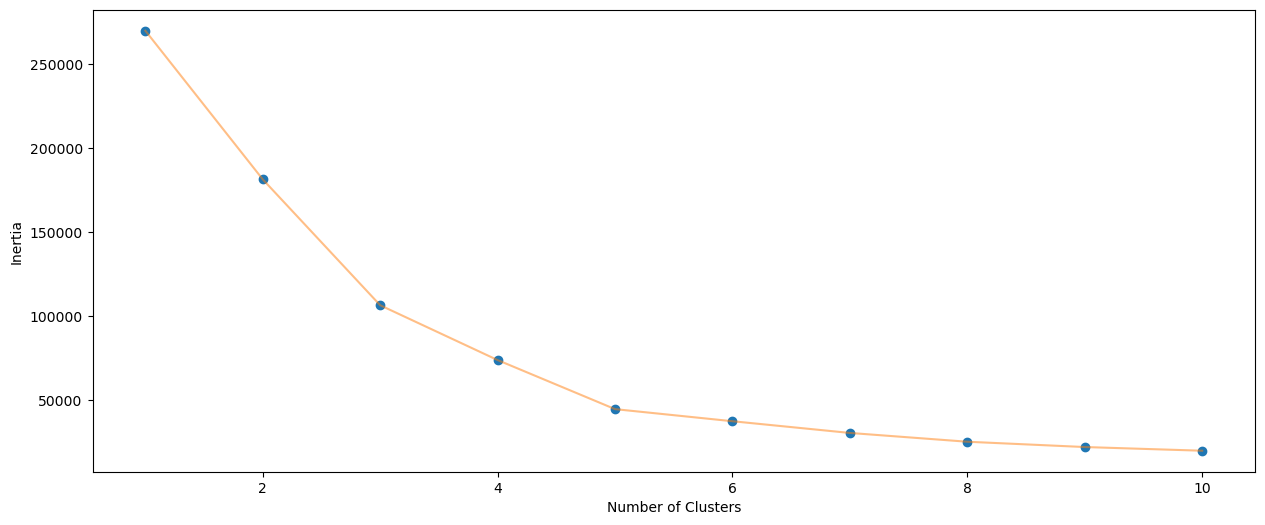

In [153]:
#Visualizing the ELBOW method to get the optimal value of K 

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [154]:
# Model building

segmentation_model_2 = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
segmentation_model_2.fit(X2)
labels2 = segmentation_model_2.labels_
centroids2 = segmentation_model_2.cluster_centers_

In [171]:
# Analysis of the characteristics of each cluster

data['Cluster'] = labels2
summary = data.groupby('Cluster').agg({
    'Annual Income (k$)': ['count', 'mean'],
    'Spending Score (1-100)': ['mean']
}).reset_index()

summary.columns = ['Cluster', 'Count', 'Annual_Income_Mean', 'Spending_Score_Mean']

summary_gender = data.groupby(['Cluster', 'Gender_Encoded']).size().unstack(fill_value=0)
summary_gender_percentage = summary_gender.div(summary_gender.sum(axis=1), axis=0) * 100  
summary_gender_percentage = summary_gender_percentage.reset_index()

summary_gender_percentage.columns.name = None
summary_gender_percentage.columns = ['Cluster', 'Percentage_Male', 'Percentage_Female']

summary = summary.merge(summary_gender_percentage, on='Cluster')

print("Cluster Summary:")
print(summary.to_string(index=False, float_format='{:.2f}'.format))

Cluster Summary:
 Cluster  Count  Annual_Income_Mean  Spending_Score_Mean  Percentage_Male  Percentage_Female
       0     22               25.73                79.36            40.91              59.09
       1     81               55.30                49.52            40.74              59.26
       2     39               86.54                82.13            46.15              53.85
       3     35               88.20                17.11            54.29              45.71
       4     23               26.30                20.91            39.13              60.87


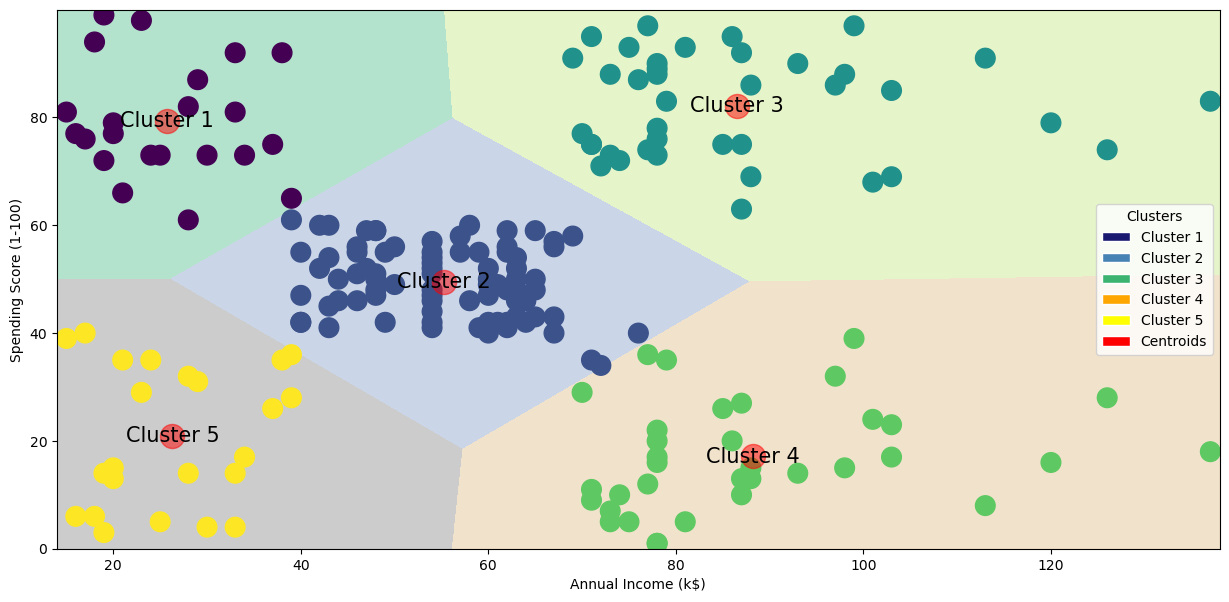

In [108]:
#Visualizing all the clusters 

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = segmentation_model_2.predict(np.c_[xx.ravel(), yy.ravel()])  

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)

for i, (x, y) in enumerate(centroids2):
    plt.text(x, y, f'Cluster {i+1}', color='black', fontsize=15, ha='center', va='center')

legend_elements = [
    Patch(facecolor='midnightblue', edgecolor='w', label='Cluster 1'),
    Patch(facecolor='steelblue', edgecolor='w', label='Cluster 2'),
    Patch(facecolor='mediumseagreen', edgecolor='w', label='Cluster 3'),
    Patch(facecolor='orange', edgecolor='w', label='Cluster 4'),
    Patch(facecolor='yellow', edgecolor='w', label='Cluster 5'),
    Patch(facecolor='red', edgecolor='w', label='Centroids')
]
plt.legend(handles=legend_elements, loc='best', title='Clusters')

plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [109]:
# 3.Segmentation using Age and Annual Income

X3 = data[['Age' , 'Annual Income (k$)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    segmentation_model_3 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    segmentation_model_3.fit(X3)
    inertia.append(segmentation_model_3.inertia_)

C:\Users\Excalibur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Excalibur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


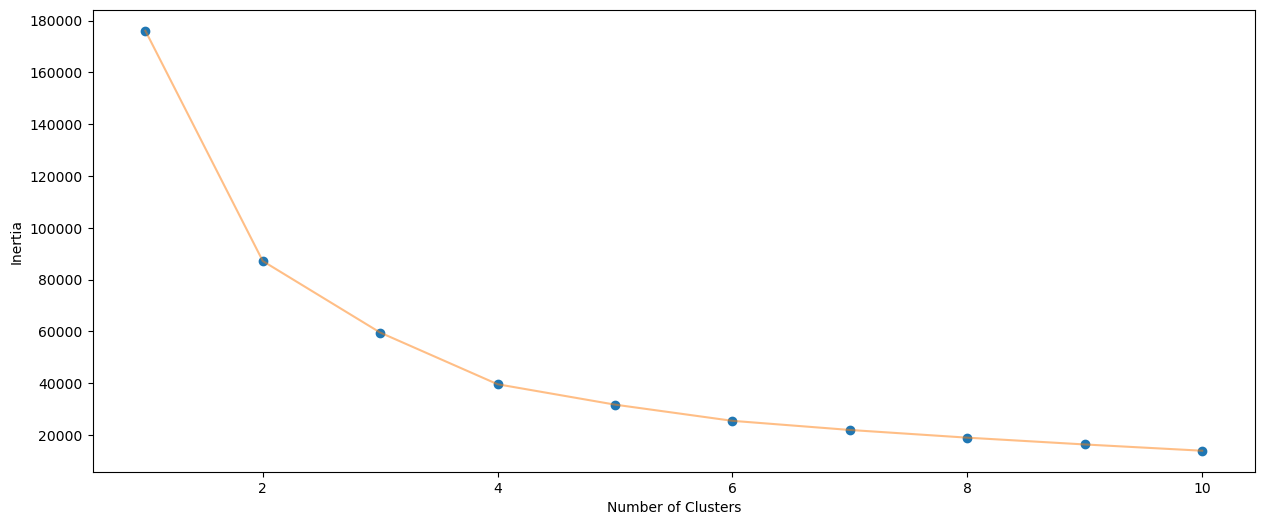

In [110]:
# Visualizing the ELBOW method to get the optimal value of K

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [111]:
# Model building

segmentation_model_3 = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
segmentation_model_3.fit(X3)
labels3 = segmentation_model_3.labels_
centroids3 = segmentation_model_3.cluster_centers_

In [177]:
# Analysis of the characteristics of each cluster

data['Cluster'] = labels3
summary = data.groupby('Cluster').agg({
    'Age': ['count', 'mean'],
    'Annual Income (k$)': ['mean']
}).reset_index()

summary.columns = ['Cluster', 'Count', 'Age_Mean', 'Annual_Income_Mean']

summary_gender = data.groupby(['Cluster', 'Gender_Encoded']).size().unstack(fill_value=0)
summary_gender_percentage = summary_gender.div(summary_gender.sum(axis=1), axis=0) * 100  
summary_gender_percentage = summary_gender_percentage.reset_index()

summary_gender_percentage.columns.name = None
summary_gender_percentage.columns = ['Cluster', 'Percentage_Male', 'Percentage_Female']

summary = summary.merge(summary_gender_percentage, on='Cluster')

print("Cluster Summary:")
print(summary.to_string(index=False, float_format='{:.2f}'.format))

Cluster Summary:
 Cluster  Count  Age_Mean  Annual_Income_Mean  Percentage_Male  Percentage_Female
       0     73     31.96               72.96            46.58              53.42
       1     54     55.81               51.78            50.00              50.00
       2     24     39.00              106.50            41.67              58.33
       3     49     30.35               29.27            34.69              65.31


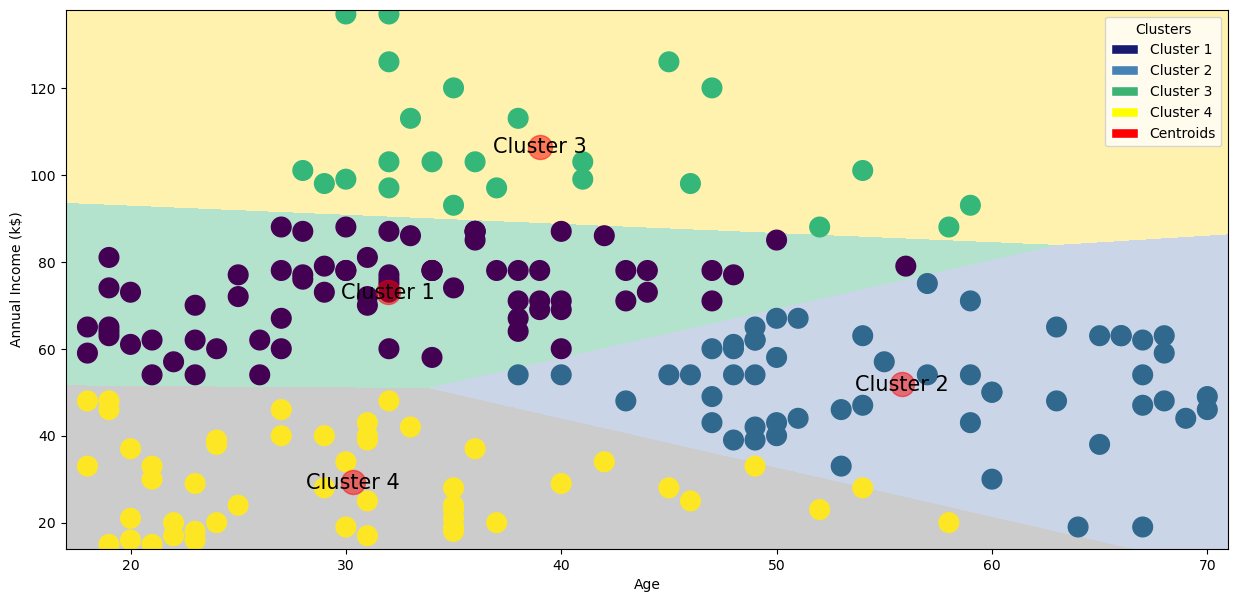

In [114]:
#Visualizing all the clusters 

h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z3 = segmentation_model_3.predict(np.c_[xx.ravel(), yy.ravel()])  

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z3 = Z3.reshape(xx.shape)
plt.imshow(Z3 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' , y = 'Annual Income (k$)' , data = data , c = labels3 , 
            s = 200 )
plt.scatter(x = centroids3[: , 0] , y =  centroids3[: , 1] , s = 300 , c = 'red' , alpha = 0.5)

for i, (x, y) in enumerate(centroids3):
    plt.text(x, y, f'Cluster {i+1}', color='black', fontsize=15, ha='center', va='center')

legend_elements = [
    Patch(facecolor='midnightblue', edgecolor='w', label='Cluster 1'),
    Patch(facecolor='steelblue', edgecolor='w', label='Cluster 2'),
    Patch(facecolor='mediumseagreen', edgecolor='w', label='Cluster 3'),
    Patch(facecolor='yellow', edgecolor='w', label='Cluster 4'),
    Patch(facecolor='red', edgecolor='w', label='Centroids')
]
plt.legend(handles=legend_elements, loc='best', title='Clusters')

plt.ylabel('Annual Income (k$)') , plt.xlabel('Age')
plt.show()